<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/Aml_assessment_2024_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA PROCESSING FOR MACHINE LEARNING##

In [ ]:
# latest version of sklearn (to have access to recent features)
!pip install --upgrade scikit-learn==1.4.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.9 MB/s eta 0:00:00


In [ ]:
!pip install category_encoders -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 615.7 kB/s eta 0:00:00


In [ ]:
# Import necessary libraries

import sklearn
# this makes is easier for getting dataframes by default as input/output of
# sklearn pipelines
sklearn.set_config(transform_output="pandas")

%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) }, style='ticks', color_codes=True, font_scale=0.8
)

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer


from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

from sklearn.metrics import PredictionErrorDisplay

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  load and view the first 5 rows
df_auto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')


**Detect and Deal with Errorneous Values**

In [ ]:
# Inspect dataframe
df_auto.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


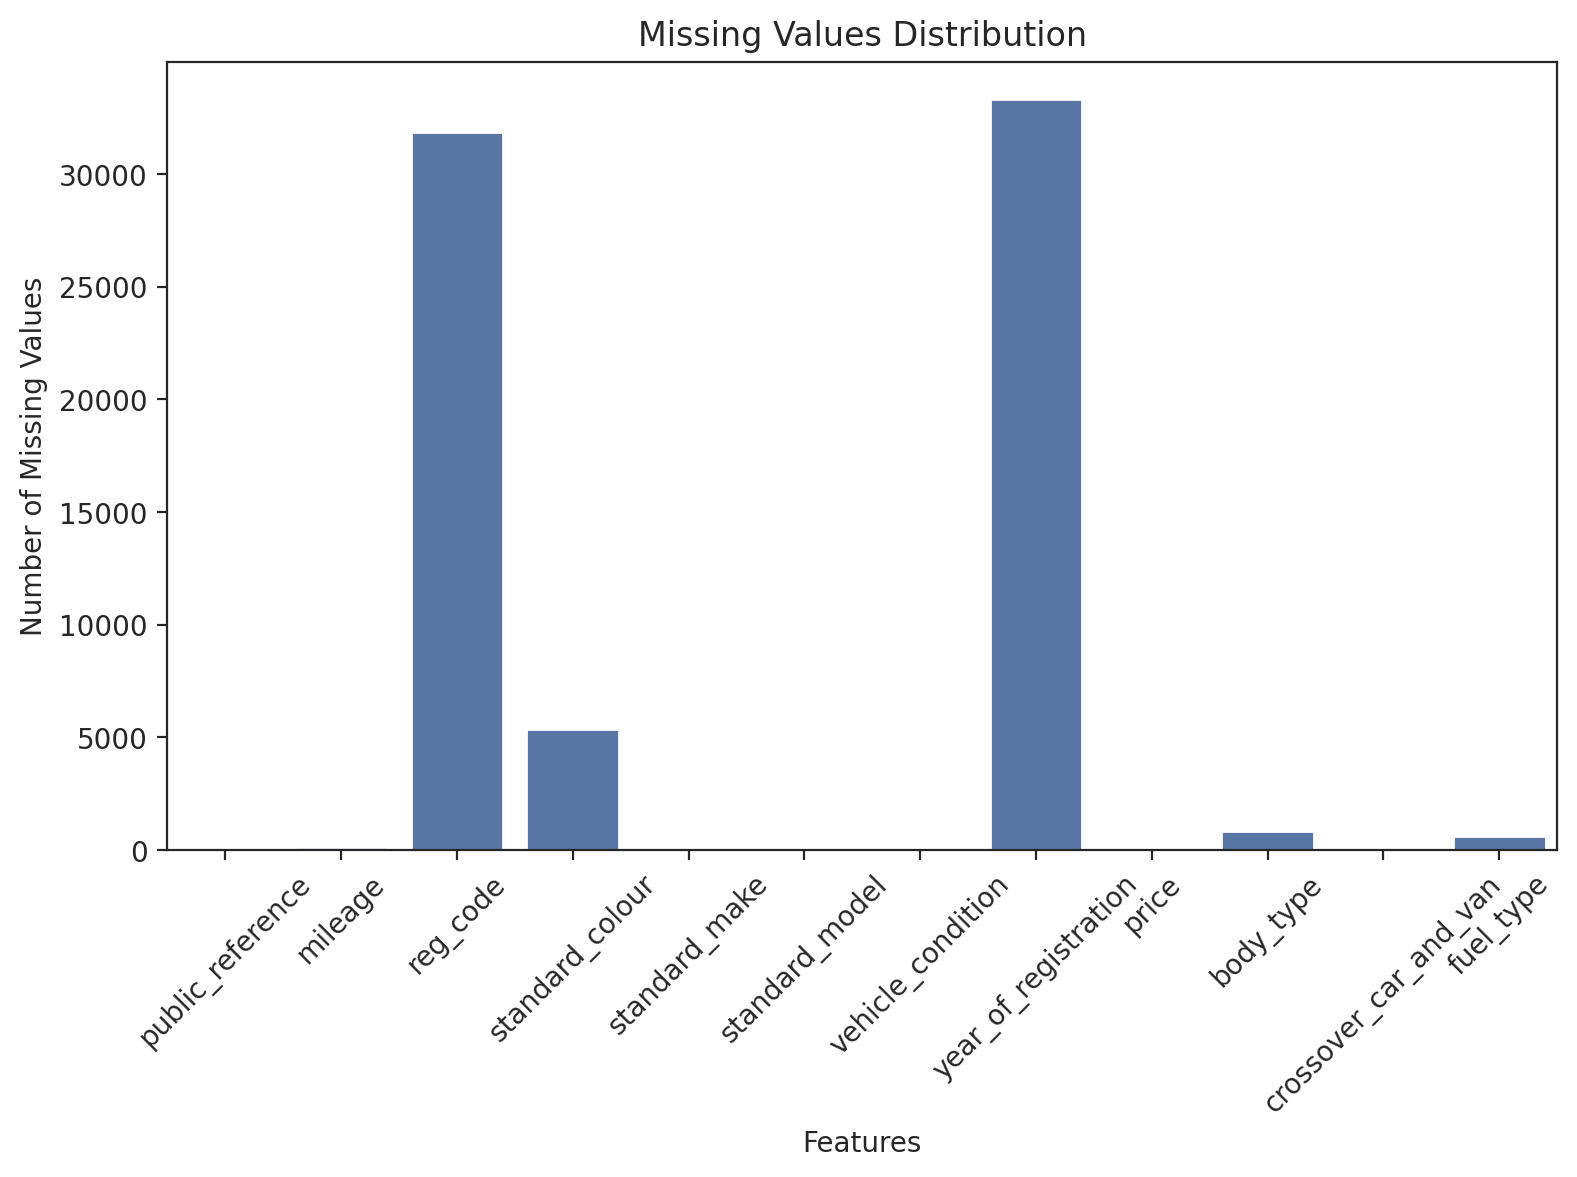

In [ ]:
# Check for missing values in the DataFrame
missing_values = df_auto.isnull().sum()

# Visualize the missing values using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values Distribution')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# get dataframe info to check for missing information
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [ ]:
# Statistically describe numerical features
df_auto.describe().T

,count,mean,std,min,25%,50%,75%,max
public_reference,402005.0,2.020071e+14,1.691662e+10,2.013072e+14,2.020090e+14,2.020093e+14,2.020102e+14,2.020110e+14
mileage,401878.0,3.774360e+04,3.483172e+04,0.000000e+00,1.048100e+04,2.862950e+04,5.687575e+04,9.999990e+05
year_of_registration,368694.0,2.015006e+03,7.962667e+00,9.990000e+02,2.013000e+03,2.016000e+03,2.018000e+03,2.020000e+03
price,402005.0,1.734197e+04,4.643746e+04,1.200000e+02,7.495000e+03,1.260000e+04,2.000000e+04,9.999999e+06


In [ ]:
# Check if mileage = 0 is consstent with new vehicle condition
df_auto[df_auto["mileage"] == 0.0].head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
44,202003178531910,0.0,NaN,NaN,Honda,Civic,NEW,NaN,19495,Hatchback,False,Petrol
45,202003318812338,0.0,NaN,Grey,Volvo,S60,NEW,NaN,40264,Saloon,False,Petrol


In [ ]:
# check unique values and counts for reg_code and year_of_registration
reg_year_code_count = df_auto[["reg_code", "year_of_registration"]].value_counts()
reg_year_code_count

reg_code  year_of_registration
17        2017.0                  36560
67        2017.0                  27781
18        2018.0                  21490
66        2016.0                  20686
16        2016.0                  19908
                                  ...  
59        2020.0                      1
61        1961.0                      1
          2014.0                      1
          2018.0                      1
s         2001.0                      1
Name: count, Length: 283, dtype: int64

In [ ]:
# Check unique values and counts for categorical features
cat_features_df = df_auto.drop(columns=['public_reference', 'mileage', 'year_of_registration', 'price'])
counts = cat_features_df.value_counts()
counts

reg_code  standard_colour  standard_make  standard_model  vehicle_condition  body_type    crossover_car_and_van  fuel_type
17        Black            Volkswagen     Polo            USED               Hatchback    False                  Petrol       252
          White            Volkswagen     Polo            USED               Hatchback    False                  Petrol       190
67        Red              Toyota         AYGO            USED               Hatchback    False                  Petrol       187
          Blue             Nissan         Qashqai         USED               SUV          False                  Petrol       181
          Black            Volkswagen     Polo            USED               Hatchback    False                  Petrol       178
                                                                                                                             ... 
53        Grey             MINI           Hatch           USED               Hatchback    False  

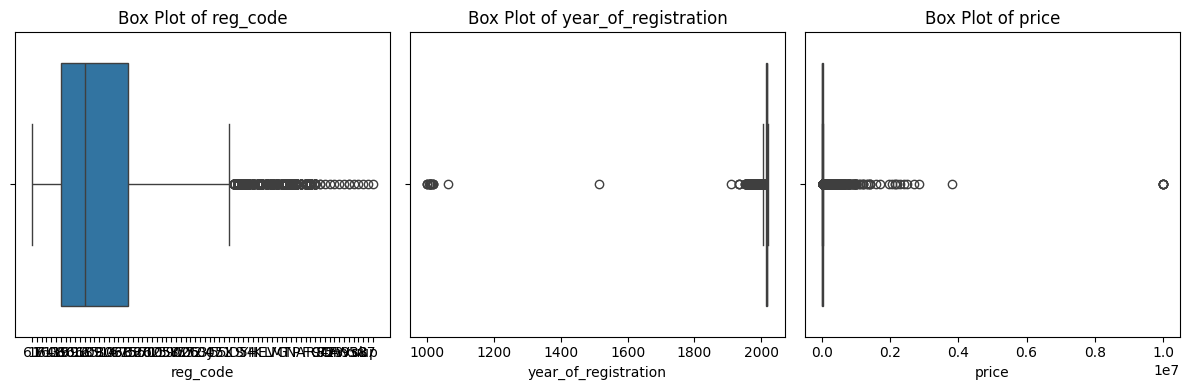

In [ ]:
# Box plots for numerical features and target outcome.

sel_feat_target = ["reg_code", "year_of_registration", "price"]

# Set up a 1x4 subplot layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# iterate over pair of aligned vectors
for i, column in enumerate(df_auto[sel_feat_target].columns):
  sns.boxplot(x=df_auto[sel_feat_target][column], ax=axes[i], showfliers=True)
  axes[i].set_title(f'Box Plot of {column}')
  axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

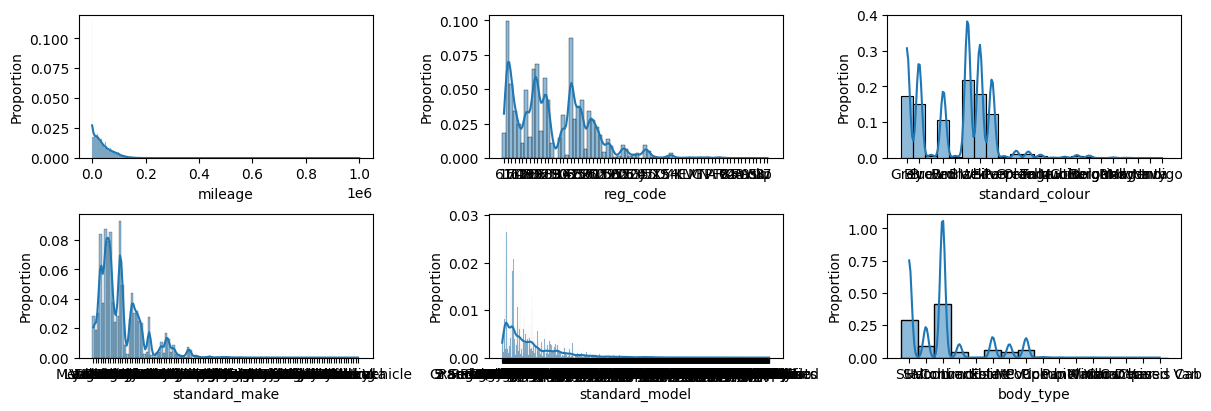

In [ ]:
# Show distribution of some the predictors
cols = df_auto.drop(columns = ["price","public_reference", "crossover_car_and_van", "vehicle_condition", "year_of_registration","fuel_type"]).columns
n_cols = 3
n_rows = 2
fig, axs = plt.subplots(
    n_rows, n_cols, figsize=(12, n_rows*2), constrained_layout=True
)
# iterating over pairs of aligned vectors...
for col, ax in zip(cols[:6], axs.ravel()):
    sns.histplot(x=df_auto[col], stat='proportion', common_norm=False, kde=True, ax=ax);

**Observation**
- The data frame contained some missing values in mileage, reg_code, standard_colour, year_of_registration, body_type, and fuel_type features.
- Some of these missing values were due to new cars whose mileage, reg_code, and year_of_registration were recorded as zero and “NaN” (not a number) respectively.
- There were also some errors in the year_of_registration and the reg_code.
- Mileage is positively skewed with outliers as shown by its descriptive statistics, histplot, and boxplot.
- Year-of-registration is negatively skewed with outliers as shown by its descriptive statistics and boxplot.

**Way Out**
- Zero values in mileage are not treated as missing values because they represent mileage for new cars.
- Mode imputation strategy is used for filling in missing values for year_of_registration because it is more robust to the outliers in its distribution.
- Mean imputation strategy is used to fill missing values for mileage.
- Inter-quantile-range (IQR) strategy is used to filter outliers
- IQR strategy provides a robust approach to identify and handle outliers
- Reg_code features is dropped because it contains same information as
  year_of_registration.
- Crossover_car_and_van is dropped for being non-informative while
  public_reference dropped for high cardinality.




In [ ]:
df_auto.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
# drop non-informative and high cardinality columns
df = df_auto
df = df.drop(columns=["public_reference", "reg_code", "crossover_car_and_van"])
df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,NaN,73970,SUV,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,Diesel


In [ ]:
# Fill in missing values
mean = df["mileage"].mean().round(1)
df['mileage'] = df_auto["mileage"].replace(np.nan, mean )

other_feat = ['standard_colour', 'standard_make','standard_model','vehicle_condition', 'body_type','fuel_type', 'year_of_registration']

mode = df[other_feat].mode().iloc[0]
df[other_feat] = df[other_feat].replace(np.nan, mode )



In [ ]:
df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,2017.0,73970,SUV,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,Diesel


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mileage               402005 non-null  float64
 1   standard_colour       402005 non-null  object 
 2   standard_make         402005 non-null  object 
 3   standard_model        402005 non-null  object 
 4   vehicle_condition     402005 non-null  object 
 5   year_of_registration  402005 non-null  float64
 6   price                 402005 non-null  int64  
 7   body_type             402005 non-null  object 
 8   fuel_type             402005 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 27.6+ MB


In [ ]:
# Remove outliers using IQR Strategy for mileage

# Calculate the first quartile (Q1)
Q1 = df['mileage'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['mileage'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
mileage_outliers = df[(df['mileage'] < lower_bound) | (df['mileage'] > upper_bound)]

# Handle outliers by removing them
df = df[~((df['mileage'] < lower_bound) | (df['mileage'] > upper_bound))]


In [ ]:
# Remove outliers using IQR Strategy for price

# Calculate the first quartile (Q1)
Q1 = df['price'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
price_outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Handle outliers by removing them
df = df[~((df['price'] < lower_bound) | (df['price'] > upper_bound))]


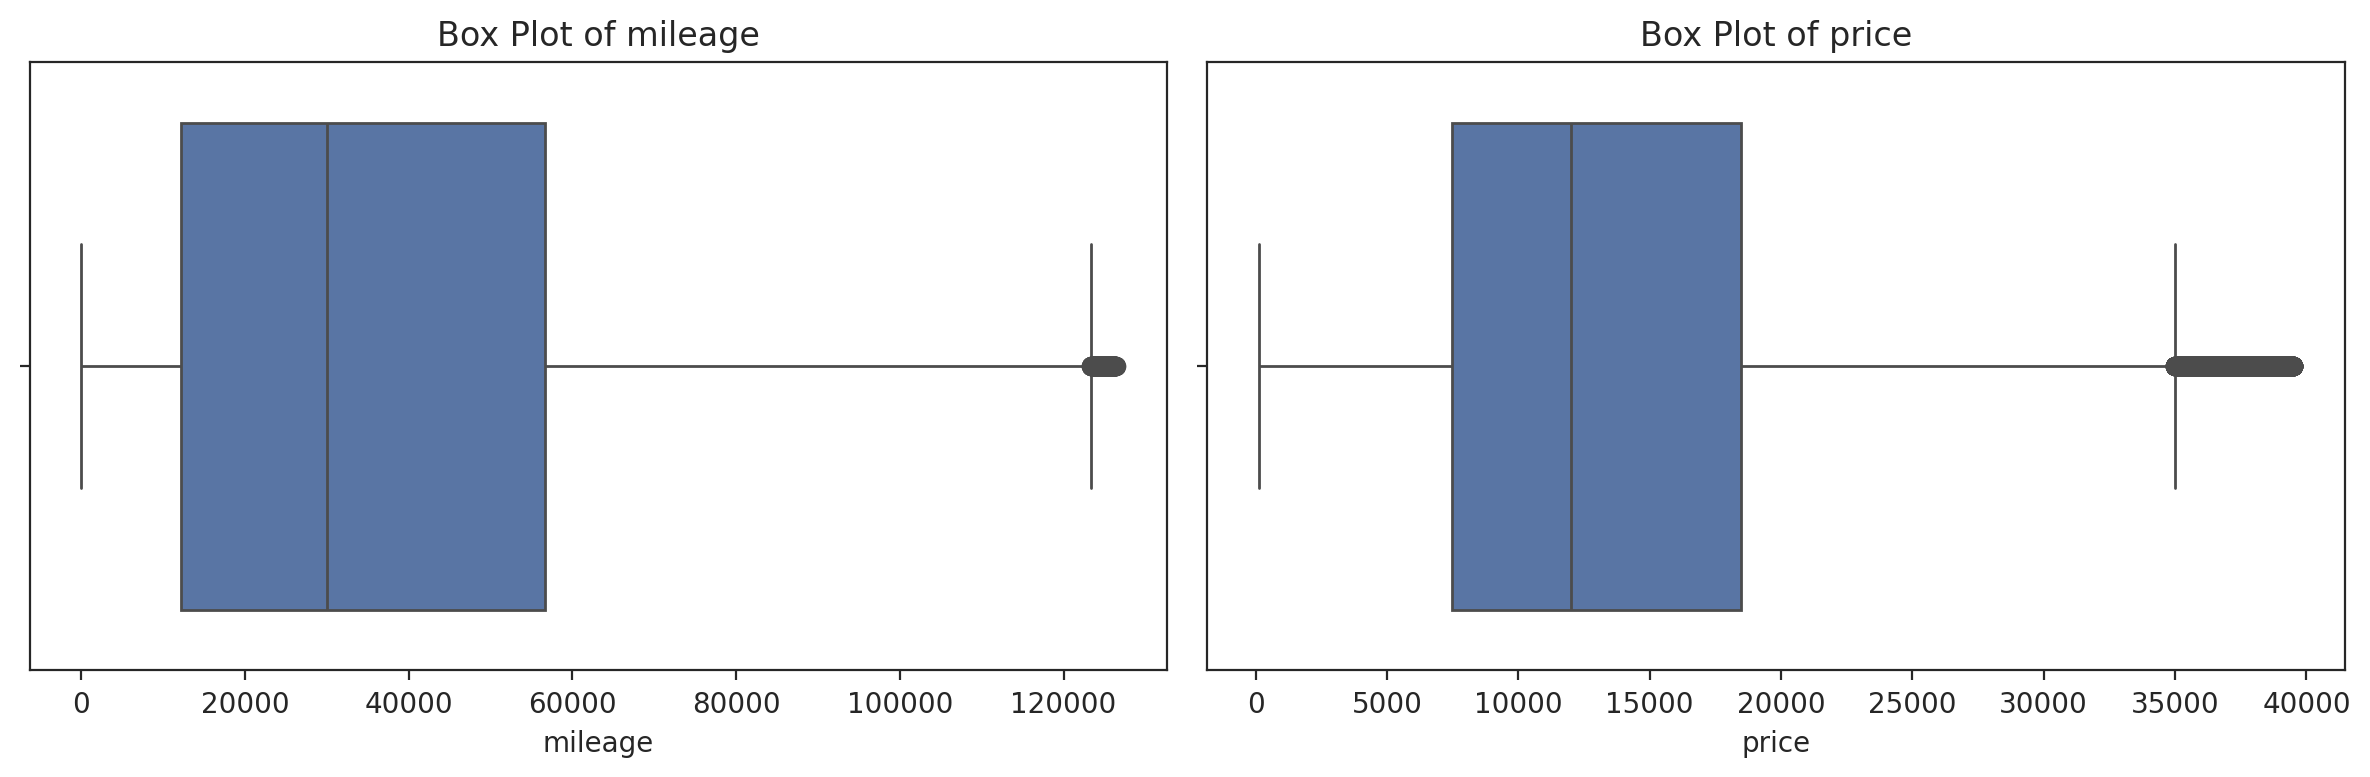

In [ ]:
# Display boxplot for mileage and price
selection = ["mileage", "price"]

# Set up a 1x2 subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# iterate over pair of aligned vectors
for i, column in enumerate(df[selection].columns):
  sns.boxplot(x=df[selection][column], ax=axes[i], showfliers=True)
  axes[i].set_title(f'Box Plot of {column}')
  axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# check data frame info after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368646 entries, 1 to 402004
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mileage               368646 non-null  float64
 1   standard_colour       368646 non-null  object 
 2   standard_make         368646 non-null  object 
 3   standard_model        368646 non-null  object 
 4   vehicle_condition     368646 non-null  object 
 5   year_of_registration  368646 non-null  float64
 6   price                 368646 non-null  int64  
 7   body_type             368646 non-null  object 
 8   fuel_type             368646 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 28.1+ MB


In [ ]:
#  split data frame into predictors and target; obtain train/validation/test folds)

# create catgorical, numerical and target objects
target = 'price'
cat_feat = ["standard_colour", "standard_make", "standard_model", "vehicle_condition", "body_type", "fuel_type"]
num_feat = ['mileage', "year_of_registration"]

# Select feature matrix and target vector
X = df[cat_feat + num_feat]
y = df[target]

# Split data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)






In [ ]:
X_train.head()

,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type,mileage,year_of_registration
143864,White,Nissan,Qashqai,USED,SUV,Petrol,752.0,2020.0
252963,Black,BMW,2 Series,USED,Coupe,Diesel,94000.0,2015.0
306628,White,Vauxhall,Corsa,USED,Hatchback,Petrol,22411.0,2019.0
39386,Silver,Volkswagen,T-Cross,NEW,SUV,Petrol,0.0,2017.0
191959,Black,Audi,Q5,USED,SUV,Diesel,42408.0,2015.0


In [ ]:
y_train.head()

143864    22695
252963     8250
306628     8850
39386     19056
191959    18990
Name: price, dtype: int64

In [ ]:
def create_pp_pipeline(X, linear =False):
    """instantiate a preprocessing pipeline for numeric and categorical data
    using simple imputers, scalers, and encoders. It relies on latest versions
    of sklearn so as to produce pandas outputs.

    X: the dataset with the features (needed for feature names)

    returns the Pipeline object
    """

    num_features = X[num_feat].columns.tolist()

    numeric_transformer = Pipeline(
        steps=[
                ("imputer", SimpleImputer(strategy="mean"))
              ]
    )

    # add scaling/polynomial features if dealing with a linear model
    if linear:
        numeric_transformer.steps.extend([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(include_bias=False,  interaction_only=True))
                                        ])

    cat_features = X.drop(columns = ["mileage", "year_of_registration"]).columns.tolist()
    categorical_transformer = Pipeline(
        steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", TargetEncoder(handle_unknown="ignore")),
              ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
                       ("num", numeric_transformer, num_features),
                       ("cat", categorical_transformer, cat_features),
                     ],
        remainder='passthrough',
        verbose_feature_names_out=False
    )

    return preprocessor



##Features Engineering##

**Produce polynomial/basis functions and interaction features**

In [ ]:
# Instantiate the preprocessing pipeline
preprocessor1 = create_pp_pipeline(X_train)

# Step 2: Fit the preprocessing pipeline to your training data
preprocessor1.fit(X_train, y_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['mileage', 'year_of_registration']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  TargetEncoder(handle_unknown='ignore'))]),
                                 ['standard_colour', 'standard_make',
                                  'standard_model', 'vehicle_condition',
                                  'body_type', 'fuel_type'])],
                  verbose_feature_names_out=False)

In [ ]:
X_train_encoded1 = preprocessor1.transform(X_train)
X_train_encoded1.head()

,mileage,year_of_registration,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
143864,752.0,2020.0,14435.051010,11342.898740,12926.721640,13088.665447,17977.455515,12312.772822
252963,94000.0,2015.0,14462.206173,17210.663264,17852.741021,13088.665447,16280.361196,14744.786236
306628,22411.0,2019.0,14435.051010,8208.944360,6860.367339,13088.665447,10357.953875,12312.772822
39386,0.0,2017.0,11308.126651,14001.094893,21436.707158,23622.502001,17977.455515,12312.772822
191959,42408.0,2015.0,14462.206173,16895.808599,21928.510783,13088.665447,17977.455515,14744.786236


In [ ]:
X_test_encoded1 = preprocessor1.transform(X_test)
X_test_encoded1.head()

,mileage,year_of_registration,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
230915,105000.0,2005.0,11552.231107,14001.094893,14406.642147,13088.665447,10357.953875,14744.786236
109259,22000.0,2017.0,15590.240934,14001.094893,14406.642147,13088.665447,10357.953875,12312.772822
241971,32346.0,2015.0,11925.819911,14001.094893,7552.538726,13088.665447,10357.953875,12312.772822
99774,29899.0,2017.0,11925.819911,8208.944360,9738.760692,13088.665447,10950.714037,12312.772822
394764,22001.0,2018.0,13625.823484,9992.736209,7016.551922,13088.665447,10357.953875,12312.772822


In [ ]:
# Convert y_train to a DataFrame with a suitable column name
y_train_df = pd.DataFrame(y_train, columns=['price'])

# Concatenate X_train and y_train_df column-wise
train_encoded_df = pd.concat([X_train_encoded1, y_train_df], axis=1)
train_encoded_df.head()

,mileage,year_of_registration,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type,price
143864,752.0,2020.0,14435.051010,11342.898740,12926.721640,13088.665447,17977.455515,12312.772822,22695
252963,94000.0,2015.0,14462.206173,17210.663264,17852.741021,13088.665447,16280.361196,14744.786236,8250
306628,22411.0,2019.0,14435.051010,8208.944360,6860.367339,13088.665447,10357.953875,12312.772822,8850
39386,0.0,2017.0,11308.126651,14001.094893,21436.707158,23622.502001,17977.455515,12312.772822,19056
191959,42408.0,2015.0,14462.206173,16895.808599,21928.510783,13088.665447,17977.455515,14744.786236,18990


In [ ]:
# Convert y_train to a DataFrame with a suitable column name
y_test_df = pd.DataFrame(y_test, columns=['price'])

# Concatenate X_test and y_test_df column-wise
test_encoded_df = pd.concat([X_test_encoded1, y_test_df], axis=1)
test_encoded_df.head()

,mileage,year_of_registration,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type,price
230915,105000.0,2005.0,11552.231107,14001.094893,14406.642147,13088.665447,10357.953875,14744.786236,1890
109259,22000.0,2017.0,15590.240934,14001.094893,14406.642147,13088.665447,10357.953875,12312.772822,22450
241971,32346.0,2015.0,11925.819911,14001.094893,7552.538726,13088.665447,10357.953875,12312.772822,5695
99774,29899.0,2017.0,11925.819911,8208.944360,9738.760692,13088.665447,10950.714037,12312.772822,9599
394764,22001.0,2018.0,13625.823484,9992.736209,7016.551922,13088.665447,10357.953875,12312.772822,6495


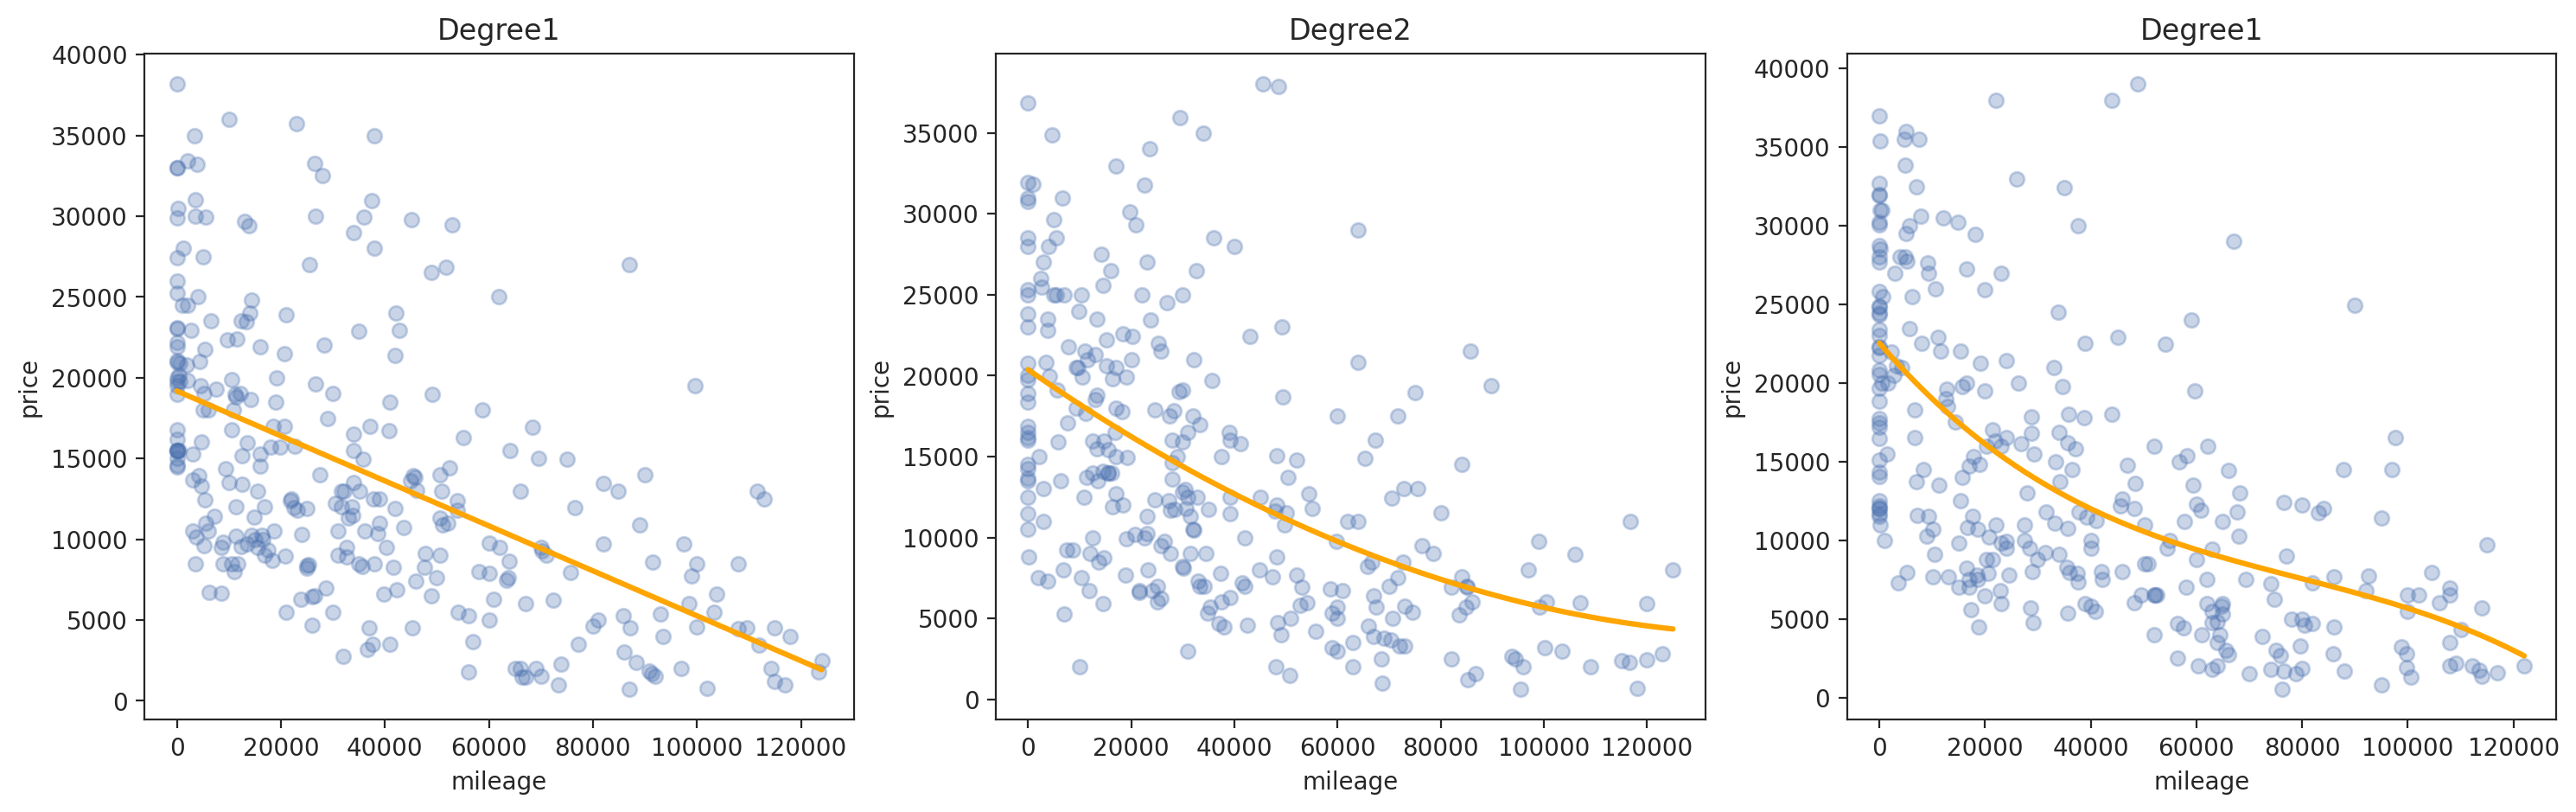

In [ ]:
# Show scatter plot and line regression
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.regplot(
    data=train_encoded_df.sample(n=300), x='mileage', y='price', order=1,
    scatter_kws=dict(alpha=0.3), line_kws=dict(color='orange'), ci=None, ax=axes[0]
)
axes[0].set_title('Degree1')

sns.regplot(
    data=train_encoded_df.sample(n=300), x='mileage', y='price', order=2,
    scatter_kws=dict(alpha=0.3), line_kws=dict(color='orange'), ci=None, ax=axes[1]
)
axes[1].set_title('Degree2')

sns.regplot(
    data=train_encoded_df.sample(n=300), x='mileage', y='price', order=3,
    scatter_kws=dict(alpha=0.3), line_kws=dict(color='orange'), ci=None, ax=axes[2]
)
axes[2].set_title('Degree1');



**Observation**
- From the scatter plot, a curve would be a better fit
- A second order line regression shows a better fit to the scatter plot than a straight line and a third order line regression.
- Polynomial regression is simply data transformation where the original data space is being transformed.
- Polynomial features create new features from the original features.
- This allows models to capture non-linear relationship between predictors and target.
- This can enhance the predictive performance of the model.
- It can also cause model to overfit to training data
- At higher degree of polynomial, their is a decrease in the interpretability of the model.
-

In [ ]:
# Use Scikit Learn to generate polynomial features
X_trainn = X_train_encoded1[["mileage"]]
PolynomialFeatures((3, 3), include_bias=False).fit_transform(X_trainn).head()

,mileage^3
143864,4.252590e+08
252963,8.305840e+14
306628,1.125599e+13
39386,0.000000e+00
191959,7.626818e+13


In [ ]:
normal_regr = Pipeline(
                         steps=[
                                  ('est', LinearRegression())
                               ]
                      )

poly_regr = Pipeline(
                      steps=[
                              ('poly', PolynomialFeatures((7, 7), include_bias=False)),
                              ('est', LinearRegression())
                            ]
)

In [ ]:
# Fit for normal regression
normal_regr.fit(X_trainn, y_train)

Pipeline(steps=[('est', LinearRegression())])

In [ ]:
# for plotting the model prediction, some test data points
# only one feature
x_pred_range = pd.DataFrame(
                             np.linspace(train_encoded_df['mileage'].min(), train_encoded_df['mileage'].max(), 1000),
    columns=['mileage']
)

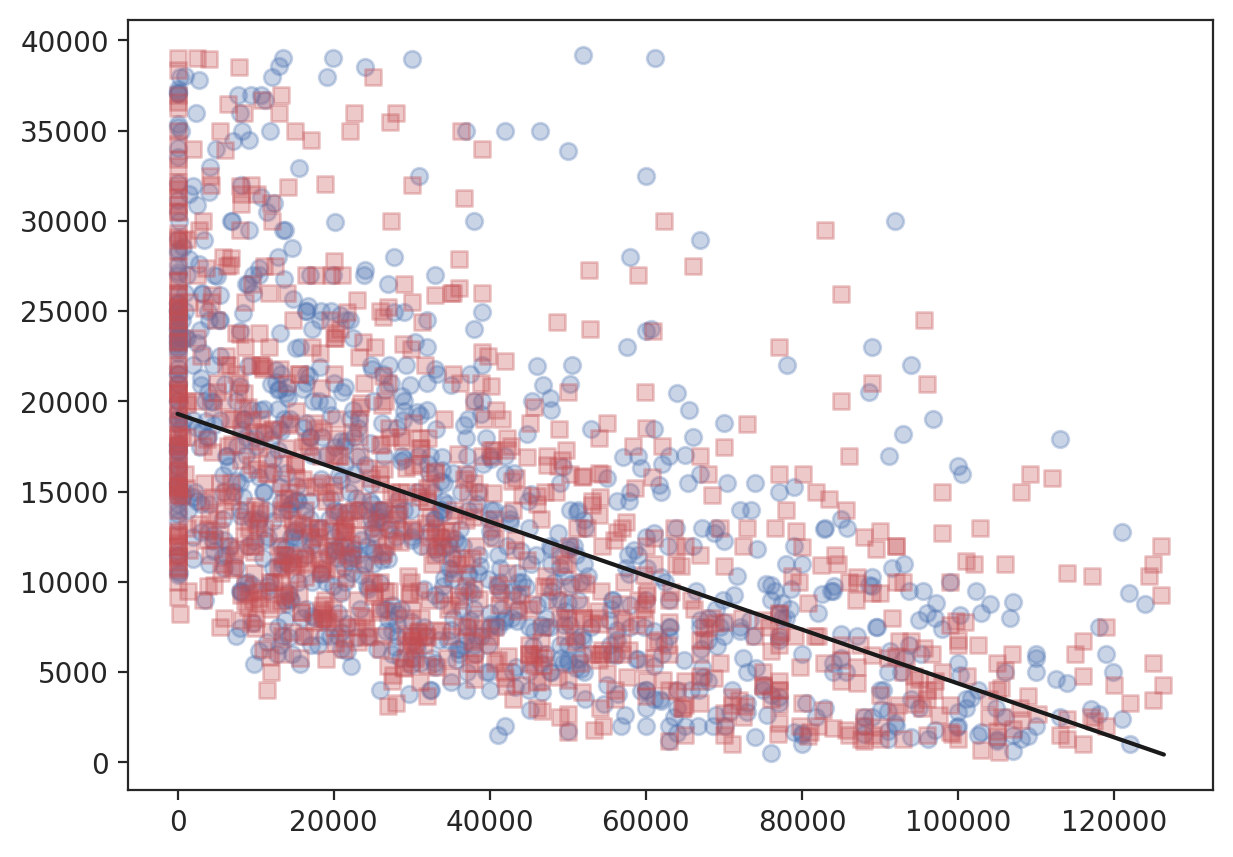

In [ ]:
# take a sample
train_encoded_sample = train_encoded_df.sample(n=1000)
test_encoded_sample = test_encoded_df.sample(n=1000)

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(train_encoded_sample["mileage"], train_encoded_sample["price"], alpha=0.3, marker='o', c='b')
ax.scatter( test_encoded_sample["mileage"], test_encoded_sample["price"], alpha=0.3, marker='s', c='r')
ax.plot(x_pred_range['mileage'], normal_regr.predict(x_pred_range), c='k');

In [ ]:
poly_regr.fit(X_trainn, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=(7, 7), include_bias=False)),
                ('est', LinearRegression())])

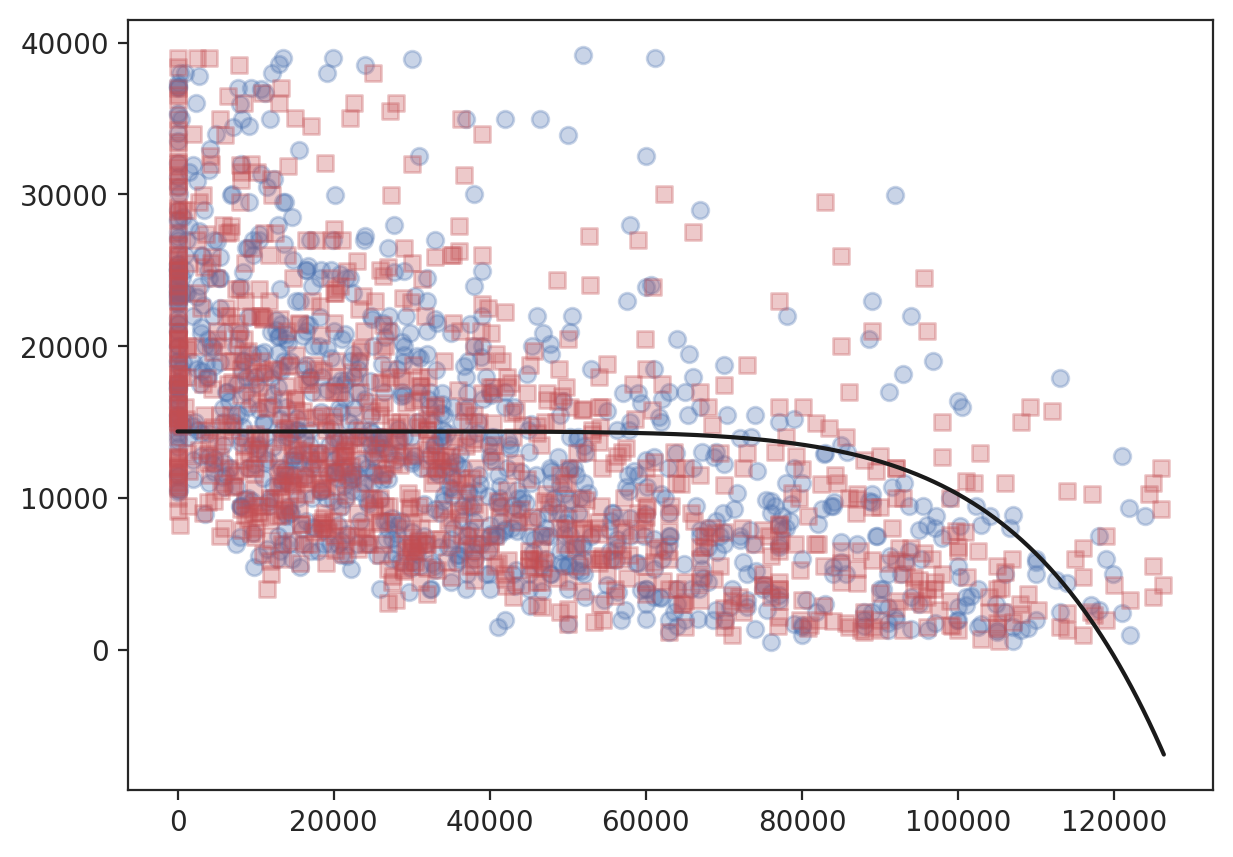

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(train_encoded_sample["mileage"], train_encoded_sample["price"], alpha=0.3, marker='o', c='b')
ax.scatter( test_encoded_sample["mileage"], test_encoded_sample["price"], alpha=0.3, marker='s', c='r')
ax.plot(x_pred_range['mileage'], poly_regr.predict(x_pred_range), c='k');

**Polynomial/basis functions with interaction features**

In [ ]:
# Split to features matrix and target vector
X_train_enc = train_encoded_df.drop(columns = "price")
y_train_enc = train_encoded_df["price"]

X_test_enc = test_encoded_df.drop(columns = "price")
y_test_enc = test_encoded_df["price"]


In [ ]:
# create pipeline
normal_reg = Pipeline(
    steps=[
             ('est', LinearRegression())
          ]
)

poly_reg = Pipeline(
                      steps=[
                               ('poly', PolynomialFeatures(
                                interaction_only=True, include_bias=False)
),
                               ('est', LinearRegression())
          ]
)

In [ ]:
poly_reg['poly'].fit_transform(X_train_enc).head()

,mileage,year_of_registration,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type,mileage year_of_registration,mileage standard_colour,...,standard_make standard_model,standard_make vehicle_condition,standard_make body_type,standard_make fuel_type,standard_model vehicle_condition,standard_model body_type,standard_model fuel_type,vehicle_condition body_type,vehicle_condition fuel_type,body_type fuel_type
143864,752.0,2020.0,14435.051010,11342.898740,12926.721640,13088.665447,17977.455515,12312.772822,1519040.0,1.085516e+07,...,1.466265e+08,1.484634e+08,2.039165e+08,1.396625e+08,1.691935e+08,2.323896e+08,1.591638e+08,2.353009e+08,1.611578e+08,2.213523e+08
252963,94000.0,2015.0,14462.206173,17210.663264,17852.741021,13088.665447,16280.361196,14744.786236,189410000.0,1.359447e+09,...,3.072575e+08,2.252646e+08,2.801958e+08,2.537676e+08,2.336686e+08,2.906491e+08,2.632349e+08,2.130882e+08,1.929896e+08,2.400504e+08
306628,22411.0,2019.0,14435.051010,8208.944360,6860.367339,13088.665447,10357.953875,12312.772822,45247809.0,3.235039e+08,...,5.631637e+07,1.074441e+08,8.502787e+07,1.010749e+08,8.979305e+07,7.105937e+07,8.447014e+07,1.355718e+08,1.611578e+08,1.275351e+08
39386,0.0,2017.0,11308.126651,14001.094893,21436.707158,23622.502001,17977.455515,12312.772822,0.0,0.000000e+00,...,3.001374e+08,3.307409e+08,2.517041e+08,1.723923e+08,5.063887e+08,3.853774e+08,2.639453e+08,4.246725e+08,2.908585e+08,2.213523e+08
191959,42408.0,2015.0,14462.206173,16895.808599,21928.510783,13088.665447,17977.455515,14744.786236,85452120.0,6.133132e+08,...,3.704999e+08,2.211436e+08,3.037436e+08,2.491251e+08,2.870149e+08,3.942188e+08,3.233312e+08,2.353009e+08,1.929896e+08,2.650737e+08


In [ ]:
normal_reg.fit(X_train_enc, y_train_enc)

Pipeline(steps=[('est', LinearRegression())])

In [ ]:
poly_reg.fit(X_train_enc, y_train_enc)

Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('est', LinearRegression())])

In [ ]:
eval_results = cross_validate(
    normal_reg, X_train_enc, y_train_enc, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)

In [ ]:
-eval_results['test_score'].mean(), eval_results['test_score'].std()

(3047.5557546989126, 10.86689808925752)

In [ ]:
-eval_results['train_score'].mean(), eval_results['train_score'].std()

(3047.32148218907, 4.655177713903585)

In [ ]:
eval_results = cross_validate(
    poly_reg, X_train_enc, y_train_enc, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)

In [ ]:
-eval_results['test_score'].mean(), eval_results['test_score'].std()

(2729.325835376921, 25.268628745050183)

In [ ]:
-eval_results['train_score'].mean(), eval_results['train_score'].std()

(2725.5569857525197, 37.760785078026096)

**Observation**
- Polynomial interraction terms are constructed by multiplying different features together.
- This allows the model to capture non-linear relationships between the individual features.
- The model is able to better fit the training data.
- There is also the risk of the model overfitting.
- Polynomial interraction increases the complexity of the model.
- this complexity decreases the interpretability of the model.